In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc,classification_report

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from math import sqrt


plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['font.serif'] = ['simhei']
plt.rcParams['axes.unicode_minus']=False # 默认是使用Unicode负号，设置正常显示字符，如正常显示负号

import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei','Droid Sans Fallback']})
import pandas as pd


In [ ]:
y_variables = [
    '物料推送装置故障1001', '物料检测装置故障2001', '填装装置检测故障4001', '填装装置定位故障4002',
    '填装装置填装故障4003', '加盖装置定位故障5001', '加盖装置加盖故障5002', '拧盖装置定位故障6001',
    '拧盖装置拧盖故障6002'
]


In [10]:
import pandas as pd
import numpy as np

# 定义文件名列表和Y变量列表
filenames = [f"A题-全部数据/附件1/M10{i}.csv" for i in range(1, 10)] + ["A题-全部数据/附件1/M110.csv"]

# 创建一个空的DataFrame用于存储结果
df_all = pd.DataFrame()

# 遍历每个文件
for filename in filenames:
    # 读取CSV文件
    temp = pd.read_csv(filename)
    for k in y_variables:
        temp[k] = temp[k].apply(lambda x: 0 if x == 0 else 1)
    # 处理每个Y变量
    for y_var in y_variables:
        
        # 选择正样本
        positive_samples = temp[temp[y_var] == 1]
        
        # 从剩余数据中随机选择与正样本数量相等的负样本
        negative_samples = temp[temp[y_var] == 0].sample(n=len(positive_samples))
        
        # 合并正负样本
        balanced_samples = pd.concat([positive_samples, negative_samples])
        
        # 将合并后的样本添加到最终的DataFrame
        df_all = pd.concat([df_all, balanced_samples])
        df_all.reset_index(drop=True,inplace=True)
        # 从temp中移除已经选取的样本
        temp = temp.drop(balanced_samples.index)

In [14]:

# 最后，保存合并后的DataFrame到新的CSV文件
df_all.to_csv('balanced_data.csv', index=False)


In [2]:
data=pd.read_csv('balanced_data.csv')
data.head()

,日期,时间,生产线编号,物料推送气缸推送状态,物料推送气缸收回状态,物料推送数,物料待抓取数,放置容器数,容器上传检测数,填装检测数,...,不合格数,物料推送装置故障1001,物料检测装置故障2001,填装装置检测故障4001,填装装置定位故障4002,填装装置填装故障4003,加盖装置定位故障5001,加盖装置加盖故障5002,拧盖装置定位故障6001,拧盖装置拧盖故障6002
0,4,27928,M101,1,1,4164,4164,1391,1390,1388,...,0,1,0,0,0,0,0,0,0,0
1,4,27929,M101,1,1,4164,4164,1391,1390,1388,...,0,1,0,0,0,0,0,0,0,0
2,4,27930,M101,1,1,4164,4164,1391,1390,1389,...,0,1,0,0,0,0,0,0,0,0
3,4,27931,M101,1,1,4164,4164,1391,1390,1389,...,0,1,0,0,0,0,0,0,0,0
4,4,27932,M101,1,1,4164,4164,1391,1390,1389,...,0,1,0,0,0,0,0,0,0,0


In [6]:
y_variables = [
    '物料推送装置故障1001', '物料检测装置故障2001', '填装装置检测故障4001', '填装装置定位故障4002',
    '填装装置填装故障4003', '加盖装置定位故障5001', '加盖装置加盖故障5002', '拧盖装置定位故障6001',
    '拧盖装置拧盖故障6002'
]


In [7]:
for i in y_variables:
    # 将data[i]中的值转换为0或1
    print(i,data[i].sum())

物料推送装置故障1001 37008
物料检测装置故障2001 23254
填装装置检测故障4001 28062
填装装置定位故障4002 26371
填装装置填装故障4003 27020
加盖装置定位故障5001 25892
加盖装置加盖故障5002 34125
拧盖装置定位故障6001 25962
拧盖装置拧盖故障6002 28998


In [8]:
data[i].value_counts()

拧盖装置拧盖故障6002
0    483510
1     28998
Name: count, dtype: int64

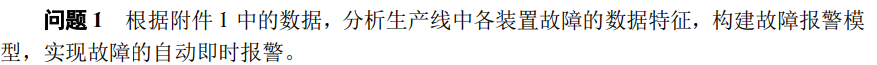

In [15]:
df_all.columns

Index(['日期', '时间', '生产线编号', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
       '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
       '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
       '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数', '物料推送装置故障1001',
       '物料检测装置故障2001', '填装装置检测故障4001', '填装装置定位故障4002', '填装装置填装故障4003',
       '加盖装置定位故障5001', '加盖装置加盖故障5002', '拧盖装置定位故障6001', '拧盖装置拧盖故障6002'],
      dtype='object')

In [41]:
Y=data['物料推送装置故障1001']

In [42]:
X=data[[ '时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
       '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
       '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
       '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数']]

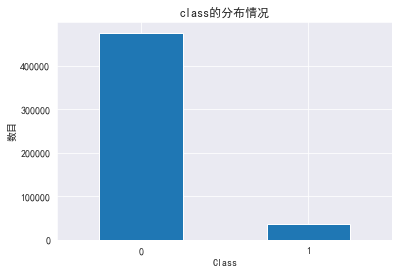

In [12]:
count_classes = pd.value_counts(Y,sort = True).sort_index()
count_classes.plot(kind='bar',rot=0)
plt.title('class的分布情况')
plt.xlabel('Class')
plt.ylabel('数目')
plt.show()


In [13]:
from collections import Counter
Counter(Y)

Counter({1: 37008, 0: 475500})

In [15]:
from imblearn.over_sampling import SMOTE
X_resampled_SMOTE, y_resampled_SMOTE = SMOTE().fit_resample(X, Y)

In [16]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled_RandomUnderSampler, y_resampled_RandomUnderSampler = RandomUnderSampler(random_state=42).fit_resample(X, Y)

In [19]:
X=np.array(X)
Y=np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

逻辑回归评价结果：
ACC 0.9970797317775913
REC 0.962067415730337
F-score 0.9794555021734156
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142628
           1       1.00      0.96      0.98     11125

    accuracy                           1.00    153753
   macro avg       1.00      0.98      0.99    153753
weighted avg       1.00      1.00      1.00    153753

[11:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost模型评价结果：
ACC 0.9999479684949236
REC 1.0
F-score 0.999640578668344
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142628
           1       1.00      1.00      1.00     11125

    accuracy                           1.00  

Text(0.5, 1.0, 'GBDT ROC(auc = 1.00)')

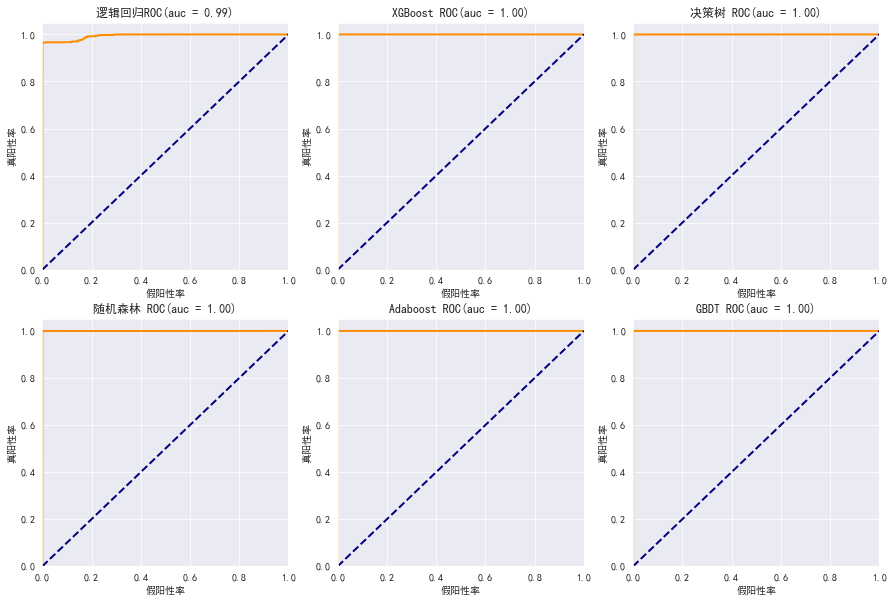

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, Y_train)
LR_y_pred = model.predict(X_test)

# 输出xgboost模型评价结果
print('逻辑回归评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, LR_y_pred))
print("REC",recall_score(Y_test, LR_y_pred))
print("F-score",f1_score(Y_test, LR_y_pred))
print(classification_report(Y_test, LR_y_pred))

y_pred_prob = model.predict_proba(X_test)[:, 1]

    # 计算ROC曲线的TPR和FPR
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

    # 计算AUC值
roc_auc = auc(fpr, tpr)


axs[0][0].plot(fpr, tpr, color='darkorange', lw=2)
axs[0][0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0][0].set_xlim([0.0, 1.0])
axs[0][0].set_ylim([0.0, 1.05])
axs[0][0].set_xlabel('假阳性率')
axs[0][0].set_ylabel('真阳性率')
axs[0][0].set_title('逻辑回归ROC(auc = %0.2f)' % roc_auc)






##'Q2-出生年', 'Q3-性别',  'Q6-文化程度', 'Q7-婚姻状况','Q8-职业'
#年龄、性别、婚姻状况、文化程度、职业
# 构建xgboost回归模型
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, Y_train)
xgb_y_pred = xgb_model.predict(X_test)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, xgb_y_pred))
print("REC",recall_score(Y_test, xgb_y_pred))
print("F-score",f1_score(Y_test, xgb_y_pred))
print(classification_report(Y_test, xgb_y_pred))

u=0
o=1
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('XGBoost ROC(auc = %0.2f)' % roc_auc)








# 构建决策树回归模型
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, Y_train)
tree_y_pred = tree_model.predict(X_test)

# 输出决策树模型评价结果
print('决策树模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, tree_y_pred))
print("REC",recall_score(Y_test, tree_y_pred))
print("F-score",f1_score(Y_test, tree_y_pred))
print(classification_report(Y_test, tree_y_pred))
u=0
o=2
y_pred_prob = tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('决策树 ROC(auc = %0.2f)' % roc_auc)





# 构建随机森林回归模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, Y_train)
rf_y_pred = rf_model.predict(X_test)

# 输出随机森林模型评价结果
print('随机森林模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, rf_y_pred))
print("REC",recall_score(Y_test, rf_y_pred))
print("F-score",f1_score(Y_test, rf_y_pred))
print(classification_report(Y_test, rf_y_pred))
u=1
o=0
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('随机森林 ROC(auc = %0.2f)' % roc_auc)



# 构建Adaboost回归模型
ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(X_train, Y_train)
ada_y_pred = ada_model.predict(X_test)
# 输出Adaboost模型评价结果
print('Adaboost模型评价结果：')
print("ACC",accuracy_score(Y_test, ada_y_pred))
print("REC",recall_score(Y_test, ada_y_pred))
print("F-score",f1_score(Y_test, ada_y_pred))
print(classification_report(Y_test, ada_y_pred))
u=1
o=1
y_pred_prob = ada_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('Adaboost ROC(auc = %0.2f)' % roc_auc)

# 构建GBDT回归模型
gbdt_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X_train, Y_train)
gbdt_y_pred = gbdt_model.predict(X_test)

# 输出GBDT模型评价结果
print('GBDT模型评价结果：')
print("ACC",accuracy_score(Y_test, gbdt_y_pred))
print("REC",recall_score(Y_test, gbdt_y_pred))
print("F-score",f1_score(Y_test, gbdt_y_pred))
print(classification_report(Y_test, gbdt_y_pred))
u=1
o=2
y_pred_prob = gbdt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('GBDT ROC(auc = %0.2f)' % roc_auc)


In [21]:

fig.savefig('./jpglist/物料推送装置故障1001ROC_原始数据.png')

In [22]:
from collections import Counter
Counter(y_resampled_SMOTE)

Counter({1: 475500, 0: 475500})

In [25]:
X_resampled_SMOTE=np.array(X_resampled_SMOTE)
y_resampled_SMOTE=np.array(y_resampled_SMOTE)

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled_SMOTE, y_resampled_SMOTE ,test_size=0.3)

逻辑回归评价结果：
ACC 0.9934735366281108
REC 0.9898296554664728
F-score 0.9934684542476094
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    142237
           1       1.00      0.99      0.99    143063

    accuracy                           0.99    285300
   macro avg       0.99      0.99      0.99    285300
weighted avg       0.99      0.99      0.99    285300

[11:11:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost模型评价结果：
ACC 0.9999719593410445
REC 1.0
F-score 0.9999720410716657
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142237
           1       1.00      1.00      1.00    143063

    accuracy                           1.00

Text(0.5, 1.0, 'GBDT ROC(auc = 1.00)')

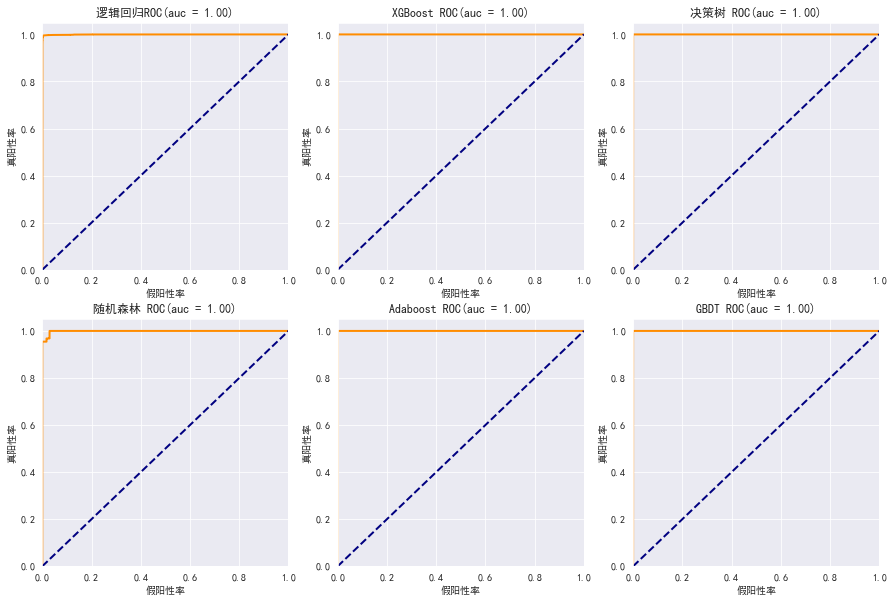

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, Y_train)
LR_y_pred = model.predict(X_test)

# 输出xgboost模型评价结果
print('逻辑回归评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, LR_y_pred))
print("REC",recall_score(Y_test, LR_y_pred))
print("F-score",f1_score(Y_test, LR_y_pred))
print(classification_report(Y_test, LR_y_pred))

y_pred_prob = model.predict_proba(X_test)[:, 1]

    # 计算ROC曲线的TPR和FPR
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

    # 计算AUC值
roc_auc = auc(fpr, tpr)


axs[0][0].plot(fpr, tpr, color='darkorange', lw=2)
axs[0][0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0][0].set_xlim([0.0, 1.0])
axs[0][0].set_ylim([0.0, 1.05])
axs[0][0].set_xlabel('假阳性率')
axs[0][0].set_ylabel('真阳性率')
axs[0][0].set_title('逻辑回归ROC(auc = %0.2f)' % roc_auc)






##'Q2-出生年', 'Q3-性别',  'Q6-文化程度', 'Q7-婚姻状况','Q8-职业'
#年龄、性别、婚姻状况、文化程度、职业
# 构建xgboost回归模型
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, Y_train)
xgb_y_pred = xgb_model.predict(X_test)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, xgb_y_pred))
print("REC",recall_score(Y_test, xgb_y_pred))
print("F-score",f1_score(Y_test, xgb_y_pred))
print(classification_report(Y_test, xgb_y_pred))

u=0
o=1
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('XGBoost ROC(auc = %0.2f)' % roc_auc)








# 构建决策树回归模型
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, Y_train)
tree_y_pred = tree_model.predict(X_test)

# 输出决策树模型评价结果
print('决策树模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, tree_y_pred))
print("REC",recall_score(Y_test, tree_y_pred))
print("F-score",f1_score(Y_test, tree_y_pred))
print(classification_report(Y_test, tree_y_pred))
u=0
o=2
y_pred_prob = tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('决策树 ROC(auc = %0.2f)' % roc_auc)





# 构建随机森林回归模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, Y_train)
rf_y_pred = rf_model.predict(X_test)

# 输出随机森林模型评价结果
print('随机森林模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, rf_y_pred))
print("REC",recall_score(Y_test, rf_y_pred))
print("F-score",f1_score(Y_test, rf_y_pred))
print(classification_report(Y_test, rf_y_pred))
u=1
o=0
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('随机森林 ROC(auc = %0.2f)' % roc_auc)



# 构建Adaboost回归模型
ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(X_train, Y_train)
ada_y_pred = ada_model.predict(X_test)
# 输出Adaboost模型评价结果
print('Adaboost模型评价结果：')
print("ACC",accuracy_score(Y_test, ada_y_pred))
print("REC",recall_score(Y_test, ada_y_pred))
print("F-score",f1_score(Y_test, ada_y_pred))
print(classification_report(Y_test, ada_y_pred))
u=1
o=1
y_pred_prob = ada_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('Adaboost ROC(auc = %0.2f)' % roc_auc)

# 构建GBDT回归模型
gbdt_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X_train, Y_train)
gbdt_y_pred = gbdt_model.predict(X_test)

# 输出GBDT模型评价结果
print('GBDT模型评价结果：')
print("ACC",accuracy_score(Y_test, gbdt_y_pred))
print("REC",recall_score(Y_test, gbdt_y_pred))
print("F-score",f1_score(Y_test, gbdt_y_pred))
print(classification_report(Y_test, gbdt_y_pred))
u=1
o=2
y_pred_prob = gbdt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('GBDT ROC(auc = %0.2f)' % roc_auc)


In [27]:
fig.savefig('./jpglist/物料推送装置故障1001ROC_smote.png')

In [83]:
Counter(y_resampled_RandomUnderSampler)

Counter({0: 4274, 1: 4274})

In [28]:
X_resampled_RandomUnderSampler=np.array(X_resampled_RandomUnderSampler)
y_resampled_RandomUnderSampler=np.array(y_resampled_RandomUnderSampler)



X_train, X_test, Y_train, Y_test = train_test_split(X_resampled_RandomUnderSampler, y_resampled_RandomUnderSampler, test_size=0.3)

逻辑回归评价结果：
ACC 0.968790812879982
REC 0.966317500451508
F-score 0.9686354378818738
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11131
           1       0.97      0.97      0.97     11074

    accuracy                           0.97     22205
   macro avg       0.97      0.97      0.97     22205
weighted avg       0.97      0.97      0.97     22205

[11:23:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost模型评价结果：
ACC 1.0
REC 1.0
F-score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11131
           1       1.00      1.00      1.00     11074

    accuracy                           1.00     22205
   macro avg       1.

Text(0.5, 1.0, 'GBDT ROC(auc = 1.00)')

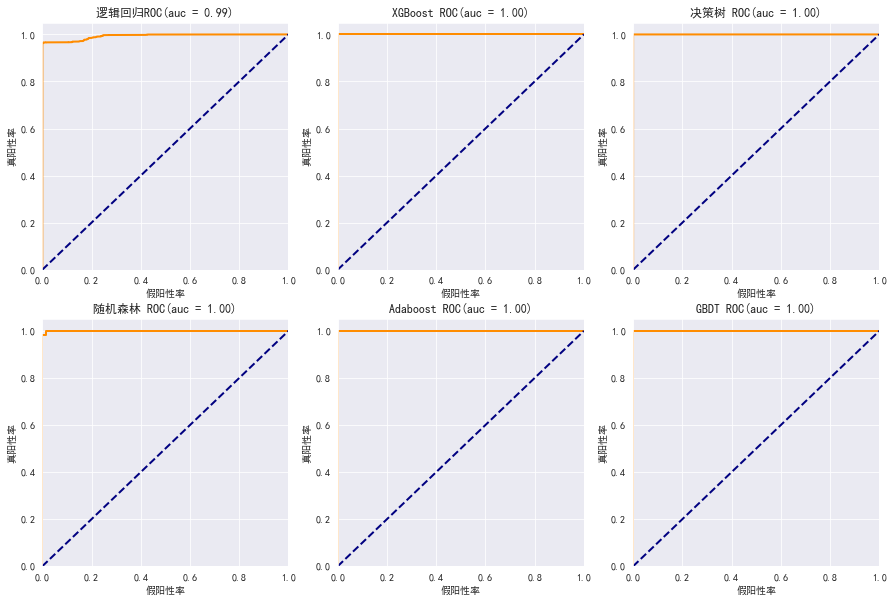

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, Y_train)
LR_y_pred = model.predict(X_test)

# 输出xgboost模型评价结果
print('逻辑回归评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, LR_y_pred))
print("REC",recall_score(Y_test, LR_y_pred))
print("F-score",f1_score(Y_test, LR_y_pred))
print(classification_report(Y_test, LR_y_pred))

y_pred_prob = model.predict_proba(X_test)[:, 1]

    # 计算ROC曲线的TPR和FPR
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

    # 计算AUC值
roc_auc = auc(fpr, tpr)


axs[0][0].plot(fpr, tpr, color='darkorange', lw=2)
axs[0][0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0][0].set_xlim([0.0, 1.0])
axs[0][0].set_ylim([0.0, 1.05])
axs[0][0].set_xlabel('假阳性率')
axs[0][0].set_ylabel('真阳性率')
axs[0][0].set_title('逻辑回归ROC(auc = %0.2f)' % roc_auc)






##'Q2-出生年', 'Q3-性别',  'Q6-文化程度', 'Q7-婚姻状况','Q8-职业'
#年龄、性别、婚姻状况、文化程度、职业
# 构建xgboost回归模型
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, Y_train)
xgb_y_pred = xgb_model.predict(X_test)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, xgb_y_pred))
print("REC",recall_score(Y_test, xgb_y_pred))
print("F-score",f1_score(Y_test, xgb_y_pred))
print(classification_report(Y_test, xgb_y_pred))

u=0
o=1
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('XGBoost ROC(auc = %0.2f)' % roc_auc)








# 构建决策树回归模型
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, Y_train)
tree_y_pred = tree_model.predict(X_test)

# 输出决策树模型评价结果
print('决策树模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, tree_y_pred))
print("REC",recall_score(Y_test, tree_y_pred))
print("F-score",f1_score(Y_test, tree_y_pred))
print(classification_report(Y_test, tree_y_pred))
u=0
o=2
y_pred_prob = tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('决策树 ROC(auc = %0.2f)' % roc_auc)





# 构建随机森林回归模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, Y_train)
rf_y_pred = rf_model.predict(X_test)

# 输出随机森林模型评价结果
print('随机森林模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, rf_y_pred))
print("REC",recall_score(Y_test, rf_y_pred))
print("F-score",f1_score(Y_test, rf_y_pred))
print(classification_report(Y_test, rf_y_pred))
u=1
o=0
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('随机森林 ROC(auc = %0.2f)' % roc_auc)



# 构建Adaboost回归模型
ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(X_train, Y_train)
ada_y_pred = ada_model.predict(X_test)
# 输出Adaboost模型评价结果
print('Adaboost模型评价结果：')
print("ACC",accuracy_score(Y_test, ada_y_pred))
print("REC",recall_score(Y_test, ada_y_pred))
print("F-score",f1_score(Y_test, ada_y_pred))
print(classification_report(Y_test, ada_y_pred))
u=1
o=1
y_pred_prob = ada_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('Adaboost ROC(auc = %0.2f)' % roc_auc)

# 构建GBDT回归模型
gbdt_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X_train, Y_train)
gbdt_y_pred = gbdt_model.predict(X_test)

# 输出GBDT模型评价结果
print('GBDT模型评价结果：')
print("ACC",accuracy_score(Y_test, gbdt_y_pred))
print("REC",recall_score(Y_test, gbdt_y_pred))
print("F-score",f1_score(Y_test, gbdt_y_pred))
print(classification_report(Y_test, gbdt_y_pred))
u=1
o=2
y_pred_prob = gbdt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
axs[u][o].plot(fpr, tpr, color='darkorange', lw=2)
axs[u][o].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[u][o].set_xlim([0.0, 1.0])
axs[u][o].set_ylim([0.0, 1.05])
axs[u][o].set_xlabel('假阳性率')
axs[u][o].set_ylabel('真阳性率')
axs[u][o].set_title('GBDT ROC(auc = %0.2f)' % roc_auc)


In [30]:
fig.savefig('./jpglist/Q1_物料推送装置故障1001ROC_下采样.png')

In [31]:
X = np.array(X)
Y = np.array(Y)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [43]:

# 构建xgboost回归模型
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# 输出xgboost模型评价结果
print('模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, y_pred))
print("REC",recall_score(Y_test, y_pred))
print("F-score",f1_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))




XGBoost模型评价结果：
ACC 0.9999349606186546
REC 0.9999096494398265
F-score 0.9995484104046242
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142685
           1       1.00      1.00      1.00     11068

    accuracy                           1.00    153753
   macro avg       1.00      1.00      1.00    153753
weighted avg       1.00      1.00      1.00    153753



F1分数: 0.9995484104046242


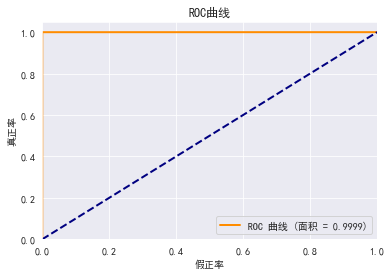

In [44]:
import numpy as np
from sklearn.metrics import roc_curve, auc, f1_score
import matplotlib.pyplot as plt

# 预测测试集的概率而不是类别
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算F1分数
f1_score = f1_score(Y_test, model.predict(X_test))
print(f'F1分数: {f1_score}')

# 计算真正率（TPR）和假正率（FPR）以及阈值
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC 曲线 (面积 = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()

F1分数: 0.9995484104046242


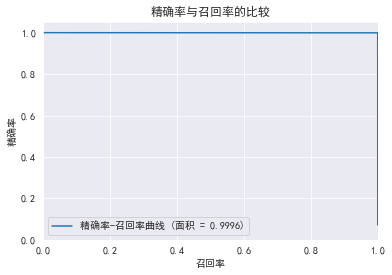

In [45]:
import numpy as np
from sklearn.metrics import f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


y_pred = model.predict(X_test)

# 计算F1分数
f1_score = f1_score(Y_test, y_pred)
print(f'F1分数: {f1_score}')

# 预测概率
y_scores = model.predict_proba(X_test)[:, 1]

# 获取精确率和召回率
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)

# 计算精确率-召回率曲线下面积(AUC)
pr_auc = auc(recall, precision)


# 绘制精确率-召回率曲线
plt.figure()
plt.plot(recall, precision, label='精确率-召回率曲线 (面积 = {0:0.4f})'.format(pr_auc))
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('精确率与召回率的比较')
plt.legend(loc="lower left")
plt.show()


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[142676,      9],
       [     1,  11067]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc,classification_report

F1 Score: 0.9995484104046242
混淆矩阵：
[[142676      9]
 [     1  11067]]


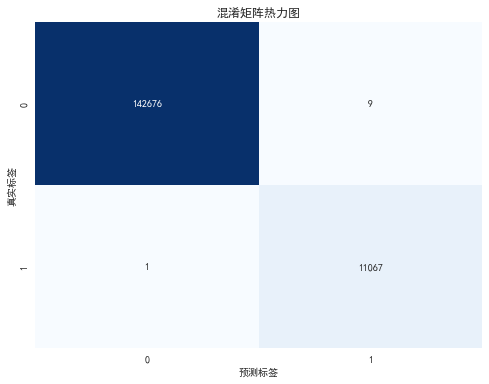

In [56]:

y_pred = model.predict(X_test)

# 计算F1分数
print(f"F1 Score: {f1_score(Y_test, y_pred)}")

# 生成混淆矩阵
cm = confusion_matrix(Y_test, y_pred)
print("混淆矩阵：")
print(cm)

# 绘制混淆矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵热力图')
plt.show()


In [57]:
model = DecisionTreeClassifier()
model.fit(X, Y)

DecisionTreeClassifier()

In [58]:
import joblib



# save the model
joblib.dump(model, './modellist/Q1_物料推送装置故障1001.bin')


['./modellist/Q1_物料推送装置故障1001.bin']

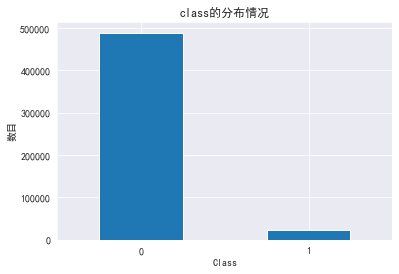

Counter({0: 489254, 1: 23254})

In [88]:

kk='物料检测装置故障2001'

Y =data[kk]
X =data[[ '时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
       '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
       '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
       '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数']]


count_classes = pd.value_counts(Y,sort = True).sort_index()
count_classes.plot(kind='bar',rot=0)
plt.title('class的分布情况')
plt.xlabel('Class')
plt.ylabel('数目')
plt.show()

from collections import Counter
Counter(Y)

In [89]:
import numpy as np
from sklearn.metrics import roc_curve, auc, f1_score
import matplotlib.pyplot as plt

XGBoost模型评价结果：
ACC 0.999193511671317
REC 0.9905674067624438
F-score 0.9909988385598142
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    146862
           1       0.99      0.99      0.99      6891

    accuracy                           1.00    153753
   macro avg       1.00      1.00      1.00    153753
weighted avg       1.00      1.00      1.00    153753



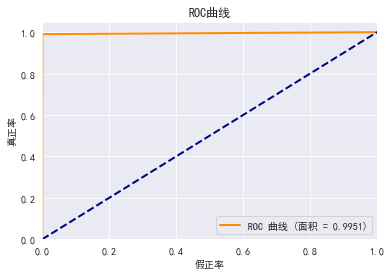

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 构建xgboost回归模型
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, y_pred))
print("REC",recall_score(Y_test, y_pred))
print("F-score",f1_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))



# 预测测试集的概率而不是类别
y_pred_proba = model.predict_proba(X_test)[:, 1]



# 计算真正率（TPR）和假正率（FPR）以及阈值
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC 曲线 (面积 = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()


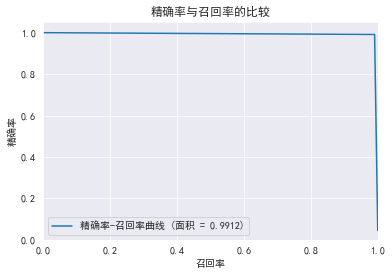

In [91]:

y_pred = model.predict(X_test)


# 预测概率
y_scores = model.predict_proba(X_test)[:, 1]

# 获取精确率和召回率
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)

# 计算精确率-召回率曲线下面积(AUC)
pr_auc = auc(recall, precision)


# 绘制精确率-召回率曲线
plt.figure()
plt.plot(recall, precision, label='精确率-召回率曲线 (面积 = {0:0.4f})'.format(pr_auc))
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('精确率与召回率的比较')
plt.legend(loc="lower left")
plt.show()

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[146803,     59],
       [    65,   6826]], dtype=int64)

混淆矩阵：
[[146803     59]
 [    65   6826]]


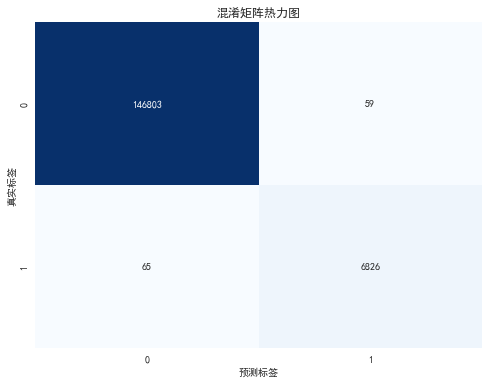

In [93]:

y_pred = model.predict(X_test)

# 生成混淆矩阵
cm = confusion_matrix(Y_test, y_pred)
print("混淆矩阵：")
print(cm)

# 绘制混淆矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵热力图')
plt.show()


In [94]:
model = DecisionTreeClassifier()
model.fit(X, Y)


# save the model
joblib.dump(model, './modellist/Q1_物料推送装置故障2001.bin')


['./modellist/Q1_物料推送装置故障2001.bin']

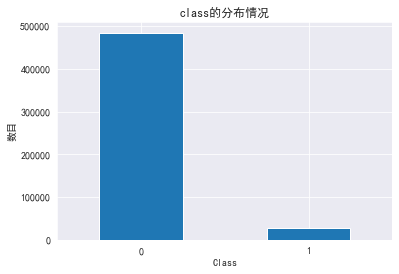

Counter({0: 484446, 1: 28062})

In [95]:

kk='填装装置检测故障4001'

Y =data[kk]
X =data[[ '时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
       '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
       '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
       '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数']]


count_classes = pd.value_counts(Y,sort = True).sort_index()
count_classes.plot(kind='bar',rot=0)
plt.title('class的分布情况')
plt.xlabel('Class')
plt.ylabel('数目')
plt.show()

from collections import Counter
Counter(Y)

XGBoost模型评价结果：
ACC 0.9999674803093273
REC 0.9998801677651288
F-score 0.9997004732522614
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    145408
           1       1.00      1.00      1.00      8345

    accuracy                           1.00    153753
   macro avg       1.00      1.00      1.00    153753
weighted avg       1.00      1.00      1.00    153753

F1分数: 0.9997004732522614


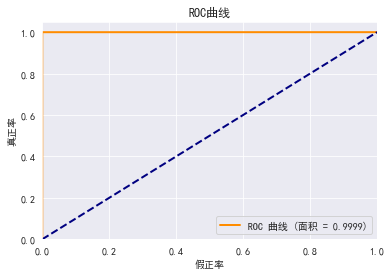

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 构建xgboost回归模型
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, y_pred))
print("REC",recall_score(Y_test, y_pred))
print("F-score",f1_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))



# 预测测试集的概率而不是类别
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算F1分数
f1_score_ = f1_score(Y_test, model.predict(X_test))
print(f'F1分数: {f1_score_}')

# 计算真正率（TPR）和假正率（FPR）以及阈值
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC 曲线 (面积 = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()


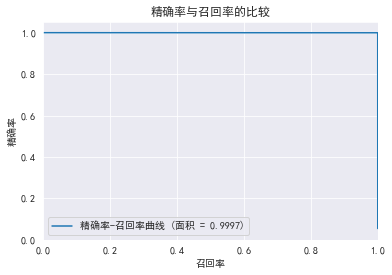

In [97]:

y_pred = model.predict(X_test)


# 预测概率
y_scores = model.predict_proba(X_test)[:, 1]

# 获取精确率和召回率
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)

# 计算精确率-召回率曲线下面积(AUC)
pr_auc = auc(recall, precision)


# 绘制精确率-召回率曲线
plt.figure()
plt.plot(recall, precision, label='精确率-召回率曲线 (面积 = {0:0.4f})'.format(pr_auc))
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('精确率与召回率的比较')
plt.legend(loc="lower left")
plt.show()

混淆矩阵：
[[145404      4]
 [     1   8344]]


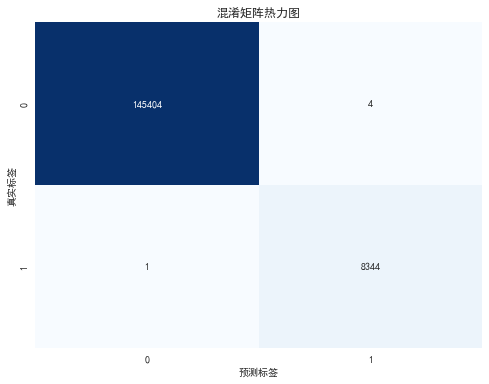

In [98]:

y_pred = model.predict(X_test)

# 生成混淆矩阵
cm = confusion_matrix(Y_test, y_pred)
print("混淆矩阵：")
print(cm)

# 绘制混淆矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵热力图')
plt.show()


In [99]:
model = DecisionTreeClassifier()
model.fit(X, Y)

# save the model
joblib.dump(model, './modellist/Q1_%s.bin'%kk)


['./modellist/Q1_填装装置检测故障4001.bin']

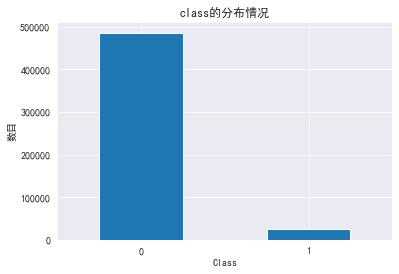

Counter({0: 486137, 1: 26371})

In [100]:

kk='填装装置定位故障4002'

Y =data[kk]
X =data[[ '时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
       '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
       '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
       '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数']]


count_classes = pd.value_counts(Y,sort = True).sort_index()
count_classes.plot(kind='bar',rot=0)
plt.title('class的分布情况')
plt.xlabel('Class')
plt.ylabel('数目')
plt.show()

from collections import Counter
Counter(Y)


XGBoost模型评价结果：
ACC 0.9994601731348332
REC 0.9941490714830832
F-score 0.9947184218899141
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    145891
           1       1.00      0.99      0.99      7862

    accuracy                           1.00    153753
   macro avg       1.00      1.00      1.00    153753
weighted avg       1.00      1.00      1.00    153753

F1分数: 0.9947184218899141


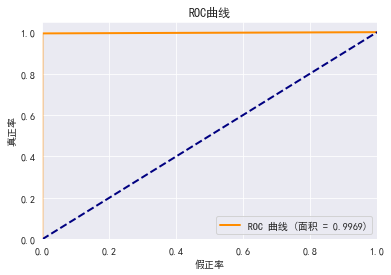

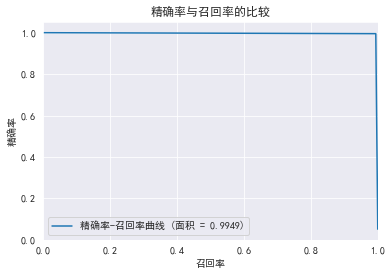

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 构建xgboost回归模型
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, y_pred))
print("REC",recall_score(Y_test, y_pred))
print("F-score",f1_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))



# 预测测试集的概率而不是类别
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算F1分数
f1_score_ = f1_score(Y_test, model.predict(X_test))
print(f'F1分数: {f1_score_}')

# 计算真正率（TPR）和假正率（FPR）以及阈值
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC 曲线 (面积 = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()




y_pred = model.predict(X_test)


# 预测概率
y_scores = model.predict_proba(X_test)[:, 1]

# 获取精确率和召回率
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)

# 计算精确率-召回率曲线下面积(AUC)
pr_auc = auc(recall, precision)


# 绘制精确率-召回率曲线
plt.figure()
plt.plot(recall, precision, label='精确率-召回率曲线 (面积 = {0:0.4f})'.format(pr_auc))
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('精确率与召回率的比较')
plt.legend(loc="lower left")
plt.show()

混淆矩阵：
[[145854     37]
 [    46   7816]]


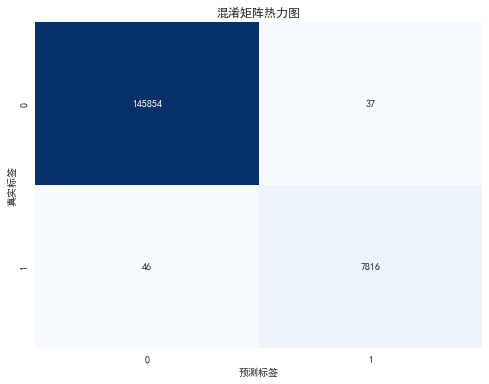

['./modellist/Q1_填装装置定位故障4002.bin']

In [102]:

y_pred = model.predict(X_test)

# 生成混淆矩阵
cm = confusion_matrix(Y_test, y_pred)
print("混淆矩阵：")
print(cm)

# 绘制混淆矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵热力图')
plt.show()


model = DecisionTreeClassifier()
model.fit(X, Y)

# save the model
joblib.dump(model, './modellist/Q1_%s.bin'%kk)


In [ ]:

kk='填装装置填装故障4003'

Y =data[kk]
X =data[[ '时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
       '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
       '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
       '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数']]


count_classes = pd.value_counts(Y,sort = True).sort_index()
count_classes.plot(kind='bar',rot=0)
plt.title('class的分布情况')
plt.xlabel('Class')
plt.ylabel('数目')
plt.show()

from collections import Counter
Counter(Y)


XGBoost模型评价结果：
ACC 0.9994601731348332
REC 0.9932655654383735
F-score 0.9947190939746772
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    145883
           1       1.00      0.99      0.99      7870

    accuracy                           1.00    153753
   macro avg       1.00      1.00      1.00    153753
weighted avg       1.00      1.00      1.00    153753

F1分数: 0.9947190939746772


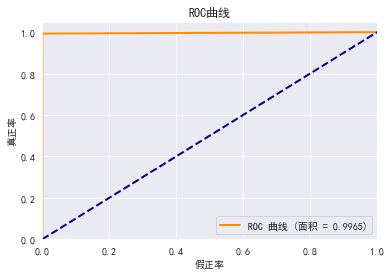

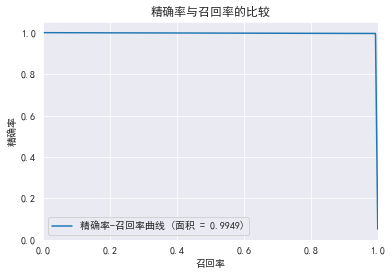

混淆矩阵：
[[145853     30]
 [    53   7817]]


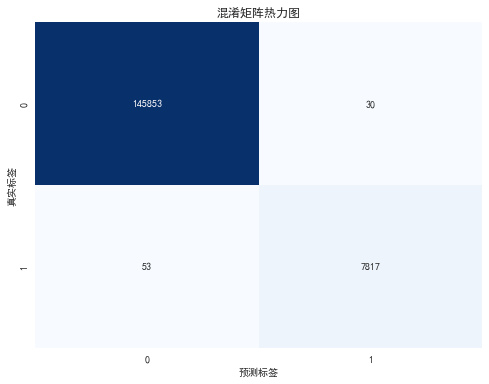

['./modellist/Q1_填装装置定位故障4002.bin']

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 构建xgboost回归模型
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, y_pred))
print("REC",recall_score(Y_test, y_pred))
print("F-score",f1_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))



# 预测测试集的概率而不是类别
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算F1分数
f1_score_ = f1_score(Y_test, model.predict(X_test))
print(f'F1分数: {f1_score_}')

# 计算真正率（TPR）和假正率（FPR）以及阈值
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC 曲线 (面积 = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()




y_pred = model.predict(X_test)


# 预测概率
y_scores = model.predict_proba(X_test)[:, 1]

# 获取精确率和召回率
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)

# 计算精确率-召回率曲线下面积(AUC)
pr_auc = auc(recall, precision)


# 绘制精确率-召回率曲线
plt.figure()
plt.plot(recall, precision, label='精确率-召回率曲线 (面积 = {0:0.4f})'.format(pr_auc))
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('精确率与召回率的比较')
plt.legend(loc="lower left")
plt.show()



y_pred = model.predict(X_test)

# 生成混淆矩阵
cm = confusion_matrix(Y_test, y_pred)
print("混淆矩阵：")
print(cm)

# 绘制混淆矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵热力图')
plt.show()


model = DecisionTreeClassifier()
model.fit(X, Y)

# save the model
joblib.dump(model, './modellist/Q1_%s.bin'%kk)


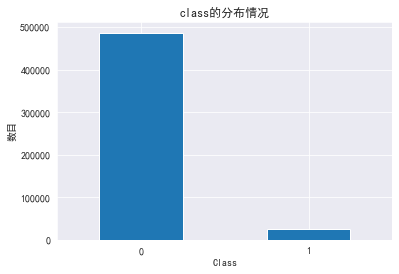

Counter({0: 486616, 1: 25892})
XGBoost模型评价结果：
ACC 0.9986927084349574
REC 0.986730844282555
F-score 0.9869234272331012
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    146066
           1       0.99      0.99      0.99      7687

    accuracy                           1.00    153753
   macro avg       0.99      0.99      0.99    153753
weighted avg       1.00      1.00      1.00    153753

F1分数: 0.9869234272331012


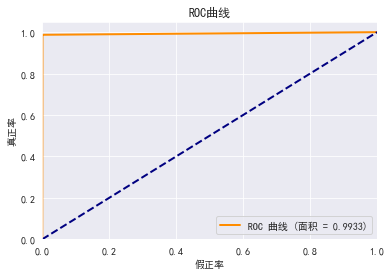

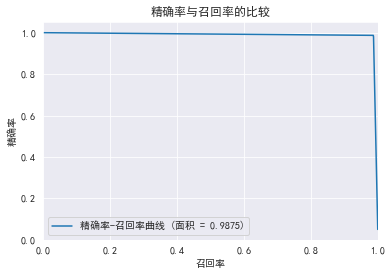

混淆矩阵：
[[145967     99]
 [   102   7585]]


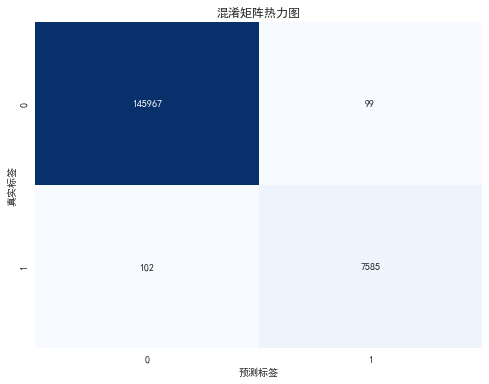

['./modellist/Q1_加盖装置定位故障5001.bin']

In [104]:

kk='加盖装置定位故障5001'

Y =data[kk]
X =data[[ '时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
       '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
       '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
       '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数']]


count_classes = pd.value_counts(Y,sort = True).sort_index()
count_classes.plot(kind='bar',rot=0)
plt.title('class的分布情况')
plt.xlabel('Class')
plt.ylabel('数目')
plt.show()

from collections import Counter
print(Counter(Y))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 构建xgboost回归模型
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, y_pred))
print("REC",recall_score(Y_test, y_pred))
print("F-score",f1_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))



# 预测测试集的概率而不是类别
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算F1分数
f1_score_ = f1_score(Y_test, model.predict(X_test))
print(f'F1分数: {f1_score_}')

# 计算真正率（TPR）和假正率（FPR）以及阈值
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC 曲线 (面积 = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()




y_pred = model.predict(X_test)


# 预测概率
y_scores = model.predict_proba(X_test)[:, 1]

# 获取精确率和召回率
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)

# 计算精确率-召回率曲线下面积(AUC)
pr_auc = auc(recall, precision)


# 绘制精确率-召回率曲线
plt.figure()
plt.plot(recall, precision, label='精确率-召回率曲线 (面积 = {0:0.4f})'.format(pr_auc))
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('精确率与召回率的比较')
plt.legend(loc="lower left")
plt.show()



y_pred = model.predict(X_test)

# 生成混淆矩阵
cm = confusion_matrix(Y_test, y_pred)
print("混淆矩阵：")
print(cm)

# 绘制混淆矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵热力图')
plt.show()


model = DecisionTreeClassifier()
model.fit(X, Y)

# save the model
joblib.dump(model, './modellist/Q1_%s.bin'%kk)


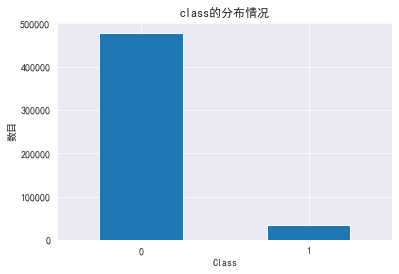

Counter({0: 478383, 1: 34125})
XGBoost模型评价结果：
ACC 0.9990114014035498
REC 0.9933914376017623
F-score 0.9927258805513016
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    143312
           1       0.99      0.99      0.99     10441

    accuracy                           1.00    153753
   macro avg       1.00      1.00      1.00    153753
weighted avg       1.00      1.00      1.00    153753

F1分数: 0.9927258805513016


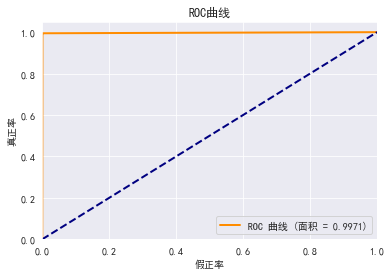

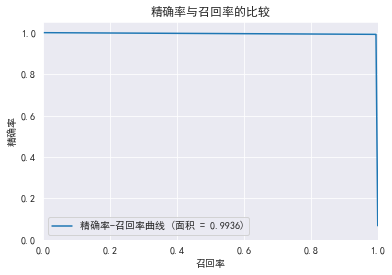

混淆矩阵：
[[143229     83]
 [    69  10372]]


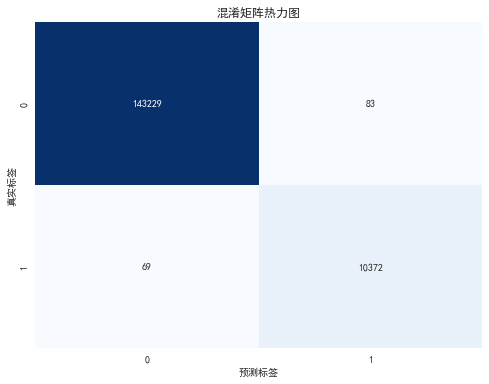

['./modellist/Q1_加盖装置加盖故障5002.bin']

In [105]:

kk='加盖装置加盖故障5002'

Y =data[kk]
X =data[[ '时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
       '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
       '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
       '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数']]


count_classes = pd.value_counts(Y,sort = True).sort_index()
count_classes.plot(kind='bar',rot=0)
plt.title('class的分布情况')
plt.xlabel('Class')
plt.ylabel('数目')
plt.show()

from collections import Counter
print(Counter(Y))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 构建xgboost回归模型
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, y_pred))
print("REC",recall_score(Y_test, y_pred))
print("F-score",f1_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))



# 预测测试集的概率而不是类别
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算F1分数
f1_score_ = f1_score(Y_test, model.predict(X_test))
print(f'F1分数: {f1_score_}')

# 计算真正率（TPR）和假正率（FPR）以及阈值
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC 曲线 (面积 = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()




y_pred = model.predict(X_test)


# 预测概率
y_scores = model.predict_proba(X_test)[:, 1]

# 获取精确率和召回率
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)

# 计算精确率-召回率曲线下面积(AUC)
pr_auc = auc(recall, precision)


# 绘制精确率-召回率曲线
plt.figure()
plt.plot(recall, precision, label='精确率-召回率曲线 (面积 = {0:0.4f})'.format(pr_auc))
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('精确率与召回率的比较')
plt.legend(loc="lower left")
plt.show()



y_pred = model.predict(X_test)

# 生成混淆矩阵
cm = confusion_matrix(Y_test, y_pred)
print("混淆矩阵：")
print(cm)

# 绘制混淆矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵热力图')
plt.show()


model = DecisionTreeClassifier()
model.fit(X, Y)

# save the model
joblib.dump(model, './modellist/Q1_%s.bin'%kk)


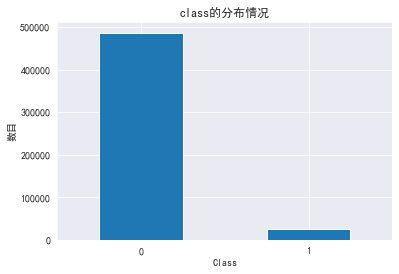

Counter({0: 486546, 1: 25962})
XGBoost模型评价结果：
ACC 0.9989528659603389
REC 0.9887799845241166
F-score 0.9896095514682155
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    145999
           1       0.99      0.99      0.99      7754

    accuracy                           1.00    153753
   macro avg       0.99      0.99      0.99    153753
weighted avg       1.00      1.00      1.00    153753

F1分数: 0.9896095514682155


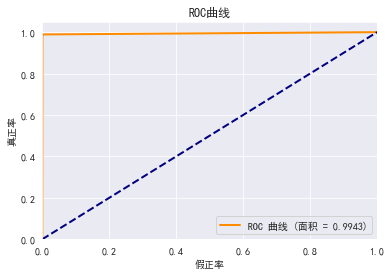

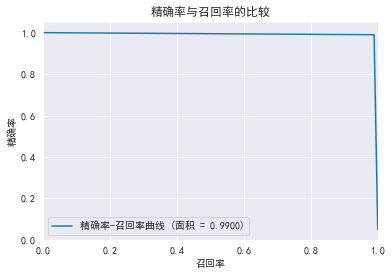

混淆矩阵：
[[145925     74]
 [    87   7667]]


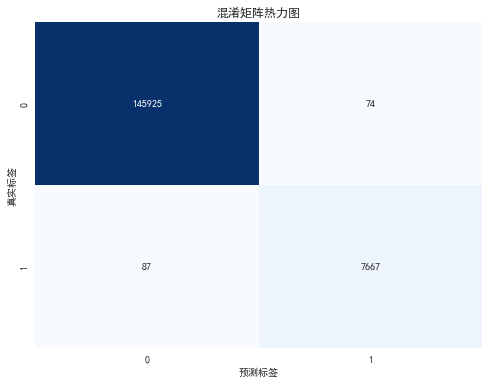

['./modellist/Q1_拧盖装置定位故障6001.bin']

In [106]:

kk='拧盖装置定位故障6001'

Y =data[kk]
X =data[[ '时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
       '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
       '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
       '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数']]


count_classes = pd.value_counts(Y,sort = True).sort_index()
count_classes.plot(kind='bar',rot=0)
plt.title('class的分布情况')
plt.xlabel('Class')
plt.ylabel('数目')
plt.show()

from collections import Counter
print(Counter(Y))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 构建xgboost回归模型
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# 输出xgboost模型评价结果
print('XGBoost模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, y_pred))
print("REC",recall_score(Y_test, y_pred))
print("F-score",f1_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))



# 预测测试集的概率而不是类别
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算F1分数
f1_score_ = f1_score(Y_test, model.predict(X_test))
print(f'F1分数: {f1_score_}')

# 计算真正率（TPR）和假正率（FPR）以及阈值
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC 曲线 (面积 = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()




y_pred = model.predict(X_test)


# 预测概率
y_scores = model.predict_proba(X_test)[:, 1]

# 获取精确率和召回率
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)

# 计算精确率-召回率曲线下面积(AUC)
pr_auc = auc(recall, precision)


# 绘制精确率-召回率曲线
plt.figure()
plt.plot(recall, precision, label='精确率-召回率曲线 (面积 = {0:0.4f})'.format(pr_auc))
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('精确率与召回率的比较')
plt.legend(loc="lower left")
plt.show()



y_pred = model.predict(X_test)

# 生成混淆矩阵
cm = confusion_matrix(Y_test, y_pred)
print("混淆矩阵：")
print(cm)

# 绘制混淆矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵热力图')
plt.show()


model = DecisionTreeClassifier()
model.fit(X, Y)

# save the model
joblib.dump(model, './modellist/Q1_%s.bin'%kk)


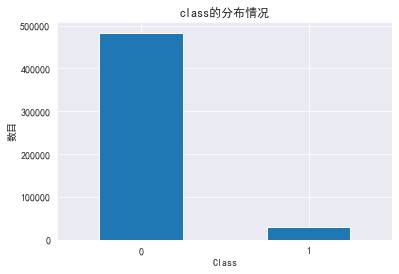

Counter({0: 483510, 1: 28998})
模型评价结果：
ACC 0.9986471808680156
REC 0.9895364536453646
F-score 0.9883132936284975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    144865
           1       0.99      0.99      0.99      8888

    accuracy                           1.00    153753
   macro avg       0.99      0.99      0.99    153753
weighted avg       1.00      1.00      1.00    153753

F1分数: 0.9883132936284975


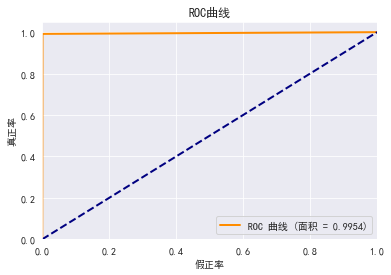

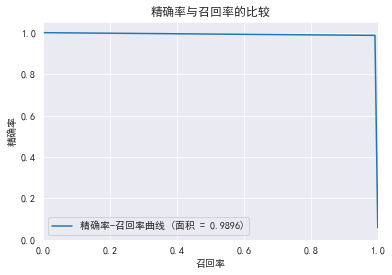

混淆矩阵：
[[144750    115]
 [    93   8795]]


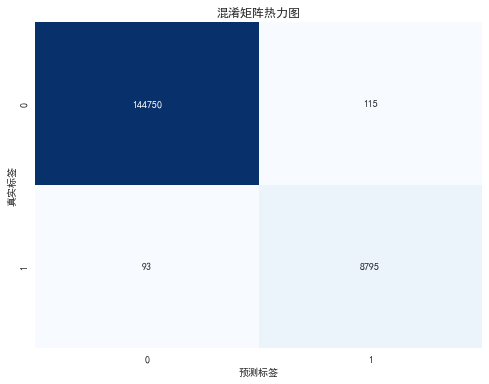

['./modellist/Q1_拧盖装置拧盖故障6002.bin']

In [107]:

kk='拧盖装置拧盖故障6002'

Y =data[kk]
X =data[[ '时间', '物料推送气缸推送状态', '物料推送气缸收回状态', '物料推送数', '物料待抓取数',
       '放置容器数', '容器上传检测数', '填装检测数', '填装定位器固定状态', '填装定位器放开状态', '物料抓取数', '填装旋转数',
       '填装下降数', '填装数', '加盖检测数', '加盖定位数', '推盖数', '加盖下降数', '加盖数', '拧盖检测数',
       '拧盖定位数', '拧盖下降数', '拧盖旋转数', '拧盖数', '合格数', '不合格数']]


count_classes = pd.value_counts(Y,sort = True).sort_index()
count_classes.plot(kind='bar',rot=0)
plt.title('class的分布情况')
plt.xlabel('Class')
plt.ylabel('数目')
plt.show()

from collections import Counter
print(Counter(Y))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# 构建xgboost回归模型
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# 输出xgboost模型评价结果
print('模型评价结果：')
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(Y_test, y_pred))
print("REC",recall_score(Y_test, y_pred))
print("F-score",f1_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))



# 预测测试集的概率而不是类别
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算F1分数
f1_score_ = f1_score(Y_test, model.predict(X_test))
print(f'F1分数: {f1_score_}')

# 计算真正率（TPR）和假正率（FPR）以及阈值
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC 曲线 (面积 = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()




y_pred = model.predict(X_test)


# 预测概率
y_scores = model.predict_proba(X_test)[:, 1]

# 获取精确率和召回率
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)

# 计算精确率-召回率曲线下面积(AUC)
pr_auc = auc(recall, precision)


# 绘制精确率-召回率曲线
plt.figure()
plt.plot(recall, precision, label='精确率-召回率曲线 (面积 = {0:0.4f})'.format(pr_auc))
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('精确率与召回率的比较')
plt.legend(loc="lower left")
plt.show()



y_pred = model.predict(X_test)

# 生成混淆矩阵
cm = confusion_matrix(Y_test, y_pred)
print("混淆矩阵：")
print(cm)

# 绘制混淆矩阵的热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵热力图')
plt.show()


model = DecisionTreeClassifier()
model.fit(X, Y)

# save the model
joblib.dump(model, './modellist/Q1_%s.bin'%kk)


array([   0, 1001], dtype=int64)